## Observations and Insights

## Dependencies and starter code

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata = "data/Mouse_metadata.csv"
study_results = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata)
study_results = pd.read_csv(study_results)

# Combine the data into a single dataset
combined_mousestudy_df = pd.merge(mouse_metadata, study_results, how='outer', on='Mouse ID')
combined_mousestudy_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [2]:
# Generate a bar plot showing number of data points for each treatment regimen using pandas

# Create a GroupBy object based upon "View Group"
combined_mousestudy_group = combined_mousestudy_df.groupby("Drug Regimen")

# Find how many rows fall into each bin
print(combined_mousestudy_group["Drug Regimen"].count())

Drug Regimen
Capomulin    230
Ceftamin     178
Infubinol    178
Ketapril     188
Naftisol     186
Placebo      181
Propriva     161
Ramicane     228
Stelasyn     181
Zoniferol    182
Name: Drug Regimen, dtype: int64


## Summary statistics

In [3]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for 
# each regimen

tumor_volume_stats = combined_mousestudy_df.groupby(
                                ["Drug Regimen"])[["Tumor Volume (mm3)"]].describe()

tumor_volume_stats

Tumor Volume (mm3)                                             \
                          count       mean       std        min        25%   
Drug Regimen                                                                 
Capomulin                 230.0  40.675741  4.994774  23.343598  37.685933   
Ceftamin                  178.0  52.591172  6.268188  45.000000  47.208427   
Infubinol                 178.0  52.884795  6.567243  36.321346  47.312353   
Ketapril                  188.0  55.235638  8.279709  45.000000  48.232987   
Naftisol                  186.0  54.331565  8.134708  45.000000  47.285874   
Placebo                   181.0  54.033581  7.821003  45.000000  47.459053   
Propriva                  161.0  52.322552  6.507770  45.000000  47.081086   
Ramicane                  228.0  40.216745  4.846308  22.050126  36.674635   
Stelasyn                  181.0  54.233149  7.710419  45.000000  48.047139   
Zoniferol                 182.0  53.236507  6.966589  45.000000  47.337876   

                                               
                    50%        75%        max  
Drug Regimen                                   
Capomulin     41.557809  45.000000  48.158209  
Ceftamin      51.776157  56.801438  68.923185  
Infubinol     51.820584  57.314444  72.226731  
Ketapril      53.698743  60.870951  78.567014  
Naftisol      52.509285  59.963034  76.668817  
Placebo       52.288934  59.916934  73.212939  
Propriva      50.854632  56.184664  72.455421  
Ramicane      40.673236  45.000000  47.622816  
Stelasyn      52.431737  58.719297  75.123690  
Zoniferol     51.818479  57.954259  73.324432

## Bar plots

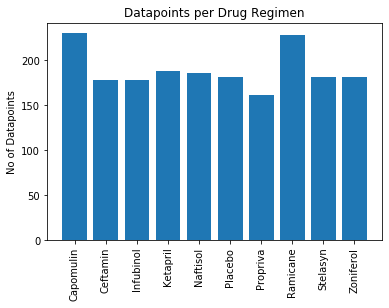

1893


In [4]:
# Generate a bar plot showing number of data points for each treatment regimen using pandas

#drug_regimen = ('Capomulin', 'Ceftamin', 'Infubinol', 'Ketapril', 'Naftisol', 'Placebo', 'Propriva', 'Ramicane', 'Stelasyn', 'Zoniferol')
#drug_datapoints = (230, 178, 178, 188, 186, 181, 161, 228, 181, 182)
plt.bar(['Capomulin', 'Ceftamin', 'Infubinol', 'Ketapril', 'Naftisol', 'Placebo', 'Propriva', 'Ramicane', 'Stelasyn', 'Zoniferol'],[230, 178, 178, 188, 186, 181, 161, 228, 181, 182])
plt.ylabel('No of Datapoints', fontsize=10)
plt.title('Datapoints per Drug Regimen')
plt.xticks(rotation='vertical')
plt.show()


#Generate a bar plot showing number of data points for each treatment regimen using pyplot

drug_regimen_counts = combined_mousestudy_df["Drug Regimen"].value_counts()
print (len(combined_mousestudy_df))

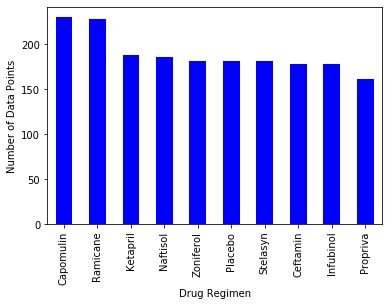

In [5]:
drug_regimen_counts.plot(kind="bar", facecolor="blue")
plt.ylabel("Number of Data Points")
plt.xlabel("Drug Regimen")
plt.show()

## Pie plots

In [6]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
combined_mousestudy_group = combined_mousestudy_df.groupby("Sex")
mouse_sex_counts = combined_mousestudy_df["Sex"].value_counts()

# Find how many rows fall into each bin
print(combined_mousestudy_group["Sex"].count())
print (mouse_sex_counts)

Sex
Female    935
Male      958
Name: Sex, dtype: int64
Male      958
Female    935
Name: Sex, dtype: int64


([<matplotlib.patches.Wedge at 0x1a1a946690>,
 [Text(-0.7536615388097399, -0.933806342299588, 'Female'),
  Text(0.690856410575595, 0.8559891471079556, 'Male')],
 [Text(-0.43963589763901484, -0.5447203663414263, '50.6%'),
  Text(0.3768307694048699, 0.46690317114979385, '49.4%')])

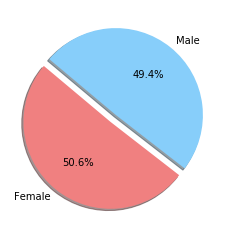

In [7]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
# Create a group based on the value os sex
#Matplotlib plt.pie
labels = ["Female", "Male"]
colors = ["lightcoral", "lightskyblue"]
explode = (0.1,0)
plt.pie(mouse_sex_counts, explode=explode, labels=labels, colors=colors, autopct="%1.1f%%", shadow=True, startangle=140)

## Quartiles, outliers and boxplots

In [8]:
# Calculate the final tumor volume of each mouse across four of the most promising treatment regimens. 
#Calculate the IQR and quantitatively determine if there are any potential outliers. 

studyresultsbymouse = combined_mousestudy_group = combined_mousestudy_df.groupby("Mouse ID")

studyresultsbymouse.head()


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1883,z969,Naftisol,Male,9,30,0,45.000000,0
1884,z969,Naftisol,Male,9,30,5,49.332999,0
1885,z969,Naftisol,Male,9,30,10,52.656081,1
1886,z969,Naftisol,Male,9,30,15,54.713005,2


In [9]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
# Find how many rows fall into each bin
print(combined_mousestudy_group["Drug Regimen"].count())

Mouse ID
a203    10
a251    10
a262    10
a275    10
a366     7
        ..
z435     3
z578    10
z581    10
z795    10
z969    10
Name: Drug Regimen, Length: 249, dtype: int64


## Line and scatter plots

In [10]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin

capomulin_study_results = combined_mousestudy_df.loc[combined_mousestudy_df["Drug Regimen"]=="Capomulin"]
capomulin_study_results


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
10,s185,Capomulin,Female,3,17,0,45.000000,0
11,s185,Capomulin,Female,3,17,5,43.878496,0
12,s185,Capomulin,Female,3,17,10,37.614948,0
13,s185,Capomulin,Female,3,17,15,38.177232,0
14,s185,Capomulin,Female,3,17,20,36.866876,0
...,...,...,...,...,...,...,...,...
440,i557,Capomulin,Female,1,24,45,47.685963,1
1452,r157,Capomulin,Male,22,25,0,45.000000,0
1453,r157,Capomulin,Male,22,25,5,45.597064,0
1454,r157,Capomulin,Male,22,25,10,46.059608,0


In [11]:

capomulin_results_s185 = capomulin_study_results.loc[capomulin_study_results["Mouse ID"]=="s185"]
capomulin_results_s185

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
10,s185,Capomulin,Female,3,17,0,45.000000,0
11,s185,Capomulin,Female,3,17,5,43.878496,0
12,s185,Capomulin,Female,3,17,10,37.614948,0
13,s185,Capomulin,Female,3,17,15,38.177232,0
14,s185,Capomulin,Female,3,17,20,36.866876,0
15,s185,Capomulin,Female,3,17,25,33.949940,0
16,s185,Capomulin,Female,3,17,30,32.959671,1
17,s185,Capomulin,Female,3,17,35,28.328531,1
18,s185,Capomulin,Female,3,17,40,25.472143,1
19,s185,Capomulin,Female,3,17,45,23.343598,1


TypeError: cannot unpack non-iterable AxesSubplot object

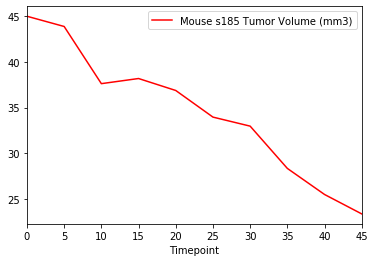

In [12]:

s185_volume_plot, = capomulin_results_s185.plot("Timepoint", "Tumor Volume (mm3)", color="red", label="Mouse s185 Tumor Volume (mm3)")
#plt.title("Tumor Volume over Time of Mouse s185")
plt.xlabel("Timepoint")
plt.ylabel("Tumor Volume")
plt.show()


In [ ]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen
# so for each mouse that had capomulin, calculate the average tumor volume and plot weight against that value
mouse_ids = 
for each mouse in 

capomulin_study_results.plot(kind='scatter',x='Weight',y='"Ave Tumor Volume",color='red')
plt.show()

In [ ]:
# Calculate the correlation coefficient and linear regression model for mouse weight and average tumor volume for the Capomulin regimen